# Limpieza de archivos 

In [1]:
import pandas as pd
import os

In [2]:
dfs = {}

dfs["df1"] = pd.read_csv(os.path.join('data','artificial-intelligence-granted-patents-by-industry.csv'))
dfs["df2"] = pd.read_csv(os.path.join('data','corporate-investment-in-artificial-intelligence-by-type.csv'))
dfs["df3"] = pd.read_csv(os.path.join('data','newly-funded-artificial-intelligence-companies.csv'))
dfs["df4"] = pd.read_csv(os.path.join('data','IA_impact_on_jobs.csv'))
dfs["df5"] = pd.read_csv(os.path.join('data', 'tech_layoffs_Q2_2024.csv'))


# Codigos para confirmar limpiezas

In [3]:
# información
[[print(f"{i}:\n"), print(f"{j.info()}\n\n")] for i,j in dfs.items()]
# print retorna None es normal 

df1:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 13 columns):
 #   Column                                                                  Non-Null Count  Dtype 
---  ------                                                                  --------------  ----- 
 0   Entity                                                                  352 non-null    object
 1   Code                                                                    352 non-null    object
 2   Year                                                                    352 non-null    int64 
 3   Patent applications granted - Field: Banking and finance                352 non-null    int64 
 4   Patent applications granted - Field: Industry and manufacturing         352 non-null    int64 
 5   Patent applications granted - Field: Energy management                  352 non-null    int64 
 6   Patent applications granted - Field: Physical sciences and engineering  352 non-null

[[None, None], [None, None], [None, None], [None, None], [None, None]]

In [4]:
# duplicados
[[print(f"{i}:"), print(f"{len(j[j.duplicated(keep=False)])}\n")] for i,j in dfs.items()]
# Lo mismo para este None

df1:
0

df2:
0

df3:
0

df4:
0

df5:
0



[[None, None], [None, None], [None, None], [None, None], [None, None]]

In [5]:
# La limpieza clave que se hizo 

In [6]:
dfs["df2"].drop(columns="Code", inplace=True)

In [7]:
dfs["df2"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Entity                             55 non-null     object
 1   Year                               55 non-null     int64 
 2   Global corporate investment in AI  55 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ KB


In [8]:
# Cargar el archivo Excel
# file_path = os.path.join('data','isoc_eb_ai$defaultview_spreadsheet.xlsx')
# excel_file = pd.ExcelFile(file_path)

# Obtener los nombres de las hojas
# print(excel_file.sheet_names)

In [9]:
# El dataset Europeo

In [10]:
#df = pd.read_excel(file_path, sheet_name='Nombre_de_la_hoja')

# Para el dataset europeo
df6 = pd.read_excel('data/isoc_eb_ai$defaultview_spreadsheet.xlsx', sheet_name='Sheet 1')


C:\Users\agusp\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [11]:
df6

,Data extracted on 09/10/2024 03:00:35 from [ESTAT],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Dataset:,Artificial intelligence by size class of enter...,NaN,NaN,NaN
1,Last updated:,24/09/2024 11:00,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,Time frequency,NaN,Annual,NaN,NaN
4,Size classes in number of persons employed,NaN,From 10 to 49 persons employed,NaN,NaN
5,Statistical classification of economic activit...,NaN,"All activities (except agriculture, forestry a...",NaN,NaN
6,Information society indicator,NaN,Enterprises use at least one of the AI technol...,NaN,NaN
7,Unit of measure,NaN,Percentage of enterprises,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,TIME,2021,NaN,2023,NaN


# Análisis de Roles Jerárquicos y Automatización por IA

## Contexto
Este notebook continúa el análisis del proyecto iniciado en `limpieza.ipynb`. 
Los datos utilizados ya han sido limpiados y procesados según los criterios 
establecidos en el notebook de limpieza.

## Datos Utilizados
- `IA_impact_on_jobs.csv`: Impacto de IA en diferentes roles laborales
- `artificial-intelligence-granted-patents-by-industry.csv`: Patentes por sector industrial de IA
- `corporate-investment-in-artificial-intelligence-by-type.csv`: Inversión corporativa global en IA
- `newly-funded-artificial-intelligence-companies.csv`: Nuevas empresas de IA fundadas
- `tech_layoffs.xlsx`: Datos sobre despidos en el sector tecnológico 2020-2024
- `isoc_eb_ai$defaultview_spreadsheet.xlsx`: Adopción de IA en empresas europeas

## Objetivo
Responder a la pregunta: "¿Por qué ciertos roles o niveles jerárquicos dentro 
de las organizaciones parecen ser más susceptibles a la automatización por IA, 
y cómo esto está reconfigurando la estructura organizacional de las empresas?"

## Lo que se realizará
Este notebook analiza por qué ciertos roles jerárquicos son más susceptibles 
a la automatización por IA y cómo esto reconfigura la estructura organizacional.

In [12]:
# Importaciones
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Datos ordenados
# Dataset 1: Impacto de IA en trabajos
df_impact = pd.read_csv('data/IA_impact_on_jobs.csv')

# Dataset 2: Patentes de IA por sector
df_patents = pd.read_csv('data/artificial-intelligence-granted-patents-by-industry.csv')

# Dataset 3: Inversión corporativa en IA
df_investment = pd.read_csv('data/corporate-investment-in-artificial-intelligence-by-type.csv')

# Dataset 4: Nuevas empresas de IA
df_companies = pd.read_csv('data/newly-funded-artificial-intelligence-companies.csv')

# Dataset 5: Despidos tecnológicos
df_layoffs = pd.read_csv('data/tech_layoffs_Q2_2024.csv')

# Dataset 6: Datos de empresas europeas
df_eu = pd.read_excel('data/isoc_eb_ai$defaultview_spreadsheet.xlsx', sheet_name='Sheet 1')

C:\Users\agusp\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [14]:
# Verificación inicial de datos
for name, df in {
    'Impacto IA': df_impact,
    'Patentes': df_patents,
    'Inversión': df_investment,
    'Empresas': df_companies,
    'Despidos': df_layoffs,
    'Europa': df_eu
}.items():
    print(f"\nDataset: {name}")
    print(f"Dimensiones: {df.shape}")
    print("Columnas:", df.columns.tolist())

# Forma ordenada de ver verificación, intenté copiarle la forma a la flo y algo de ia :D


Dataset: Impacto IA
Dimensiones: (4706, 6)
Columnas: ['Job titiles', 'AI Impact', 'Tasks', 'AI models', 'AI_Workload_Ratio', 'Domain']

Dataset: Patentes
Dimensiones: (352, 13)
Columnas: ['Entity', 'Code', 'Year', 'Patent applications granted - Field: Banking and finance', 'Patent applications granted - Field: Industry and manufacturing', 'Patent applications granted - Field: Energy management', 'Patent applications granted - Field: Physical sciences and engineering', 'Patent applications granted - Field: Security', 'Patent applications granted - Field: Life sciences', 'Patent applications granted - Field: Transportation', 'Patent applications granted - Field: Business', 'Patent applications granted - Field: Telecommunications', 'Patent applications granted - Field: Personal devices and computing']

Dataset: Inversión
Dimensiones: (55, 4)
Columnas: ['Entity', 'Code', 'Year', 'Global corporate investment in AI']

Dataset: Empresas
Dimensiones: (44, 4)
Columnas: ['Entity', 'Code', 'Year

## "Análisis para responder la pregunta de investigación"

## Pregunta

## ¿Por qué ciertos roles o niveles jerárquicos dentro de las organizaciones parecen ser más susceptibles a la automatización por IA, y cómo esto está reconfigurando la estructura organizacional de las empresas?


## 1.1 Análisis por dominio y nivel jerárquico


In [15]:
print("\nAnálisis de impacto por dominio:")

# Sacar del data 4, las areas de ia, como modelos la cantidad de tareas
# Usamos el Dominio
domain_analysis = dfs["df4"].groupby('Domain').agg({
    'AI_Workload_Ratio': 'mean',
    'AI models': 'mean',
    'Tasks': 'mean'
}).sort_values('AI_Workload_Ratio', ascending=False)

domain_analysis

# y Creamos 2 graficos para sacar información


Análisis de impacto por dominio:


,AI_Workload_Ratio,AI models,Tasks
Domain,,,
Administrative & Clerical,inf,1808.208068,395.673036
Construction,inf,1849.408511,410.734043
Supply Chain & Logistics,inf,1786.021231,393.356688
Data & IT,inf,1814.462845,392.452229
Law Enforcement,inf,1778.427660,401.202128
Medical & Healthcare,inf,1760.847134,386.643312
Sales & Marketing,0.207530,1855.704255,412.740426
Leadership & Strategy,0.204877,1817.467091,398.779193
Hospitality,0.204731,1869.451064,416.682979


<Figure size 1200x600 with 0 Axes>

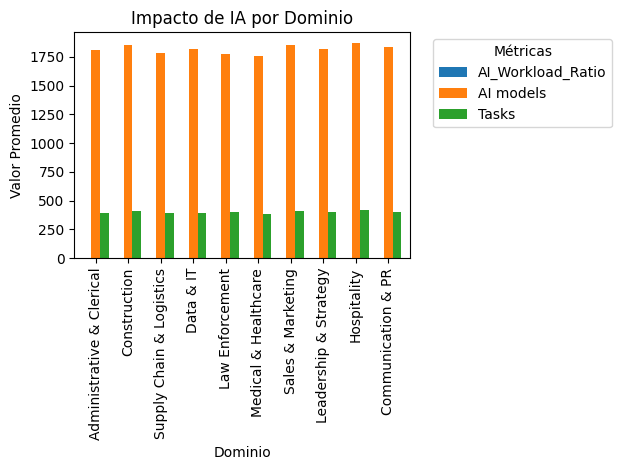

In [16]:
# Visualización de impacto por dominio
plt.figure(figsize=(12, 6))
# Gráfico de barras combinadas para mostrar múltiples métricas por dominio
domain_analysis.plot(kind='bar', width=0.8)
plt.title('Impacto de IA por Dominio')
plt.xlabel('Dominio')
plt.ylabel('Valor Promedio')
plt.legend(title='Métricas', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

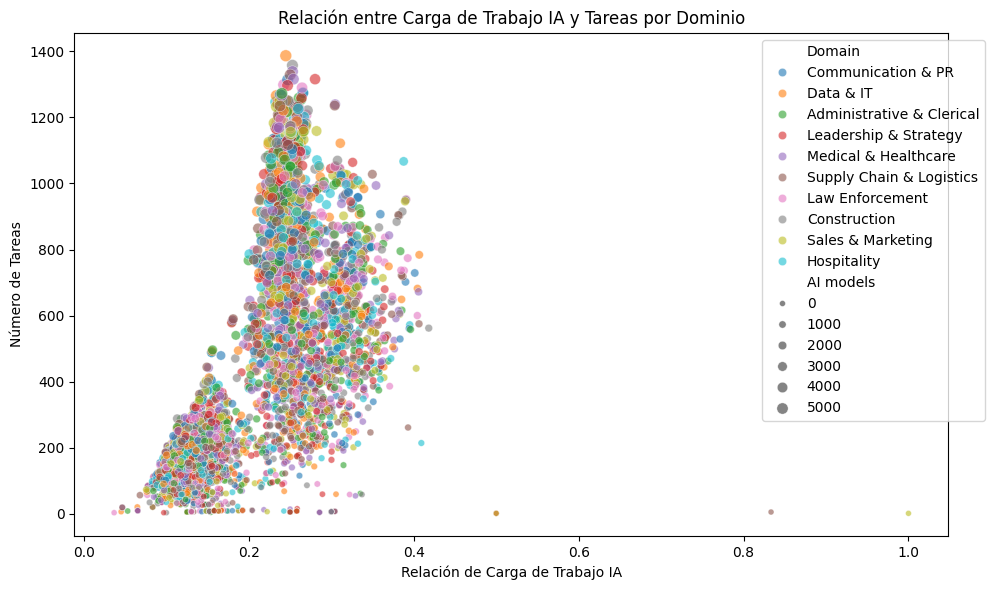

In [17]:
# scatter plot para roles
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfs["df4"], 
                x='AI_Workload_Ratio', 
                y='Tasks',
                hue='Domain',
                size='AI models',
                alpha=0.6)
plt.title('Relación entre Carga de Trabajo IA y Tareas por Dominio')
plt.xlabel('Relación de Carga de Trabajo IA')
plt.ylabel('Número de Tareas')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## Análisis por Dominio y Nivel Jerárquico
Del gráfico de barras de Impacto por Dominio:

- Se observa que todos los dominios tienen una alta proporción de modelos de IA (barras naranjas), lo que indica una amplia penetración de la tecnología
- Las tareas (barras verdes) se mantienen relativamente constantes entre dominios

Del gráfico por scatter plot para ver las relaciones de Trabajo Ia y de Dominio

- La carga de trabajo producido por la misma IA con el número de Tareas, con su eje x e y respectivamente
- En su distribución, la mayoría de las tareas tienen una carga de trabajo baja (menos de 0.4), con algo que varía, y como el número de tareas se puede notar que es entre las 200 a más de 1000, el general que se les dan.
- En su relación se observa que aumenta la carga de trabajo de IA, como de las tareas, pero no siempre. Existe una clara correlación positiva: a más tareas, mayor carga de trabajo IA
- Los colores representan diferentes áreas de trabajo (como salud, tecnología, etc.). Siendo que estas áreas están distribuidas en todo el gráfico, pero algunas pueden ser más comunes en ciertos rangos.
- Los puntos más grandes (que representan modelos más grandes de IA) aparecen más arriba en el gráfico, lo que sugiere que los modelos grandes se usan más para tareas con muchas operaciones.

## 1.2 Análisis de susceptibilidad de factores de automatización


In [18]:
# Correlación entre variables de impacto
# Sacamos la correlación de la carga de trabajo con la cantidad de modelos
correlation_matrix = dfs["df4"][['AI_Workload_Ratio', 'Tasks', 'AI models']].corr()
print("\nCorrelación entre factores de automatización:")
correlation_matrix


Correlación entre factores de automatización:


,AI_Workload_Ratio,Tasks,AI models
AI_Workload_Ratio,1.000000,0.631305,0.346893
Tasks,0.631305,1.000000,0.928350
AI models,0.346893,0.928350,1.000000


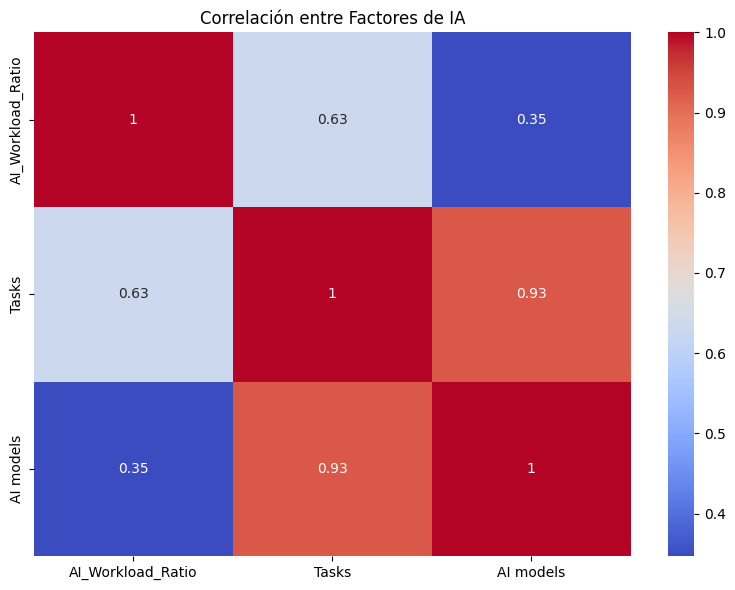

In [19]:
# Correlación en impacto IA en heatmap
correlation_matrix = dfs["df4"][['AI_Workload_Ratio', 'Tasks', 'AI models']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre Factores de IA')
plt.tight_layout()
plt.show()

## Análisis del heatmap de correlación:

- Alta correlación (0.93) entre Tasks y AI models, indicando que roles con más tareas tienden a implementar más modelos de IA
- Correlación moderada (0.63) entre Tasks y AI_Workload_Ratio
- Correlación más baja (0.35) entre AI_Workload_Ratio y AI models
- Sugiriendo que la cantidad de modelos no determina directamente la carga de trabajo automatizada

## 1.3 Análisis de patrones en despidos


In [20]:
# Momento de dato invalido que no deja hacer calculo
# En este apartado tuvimos que hacer una mini limpieza por el apartado de '#DIV/0!'
# Que es un dato que no ayuda para los calcuos que queremos sacar en nuestro patrones y en donde tuvimos que dejarlo como NaN
df_layoffs_clean = dfs["df5"].copy()

# Limpiar Percentage (reemplazar '#DIV/0!' por NaN)
df_layoffs_clean['Percentage'] = df_layoffs_clean['Percentage'].replace('#DIV/0!', np.nan)
df_layoffs_clean['Percentage'] = pd.to_numeric(df_layoffs_clean['Percentage'], errors='coerce')

# Limpiar Company_Size_before_Layoffs
df_layoffs_clean['Company_Size_before_Layoffs'] = df_layoffs_clean['Company_Size_before_Layoffs'].replace('#DIV/0!', np.nan)
df_layoffs_clean['Company_Size_before_Layoffs'] = pd.to_numeric(df_layoffs_clean['Company_Size_before_Layoffs'], errors='coerce')

# Laid_Off ya es numérico (float64) :D

# Apartado ayudado con ia, para sacar mejor esta parte

In [21]:
# Análisis de dataframse con los patrones de despidos por Industrias para sacar
layoffs_by_industry = df_layoffs_clean.groupby('Industry').agg({
    'Laid_Off': 'sum',
    'Company_Size_before_Layoffs': 'mean',
    'Percentage': 'mean'
}).round(2).sort_values('Laid_Off', ascending=False)

print("\nPatrones de despidos por industria:")
layoffs_by_industry

# Igual se lo pedí mejor a la ia para que lo saque 


Patrones de despidos por industria:


,Laid_Off,Company_Size_before_Layoffs,Percentage
Industry,,,
Retail,59703.0,12606.16,NaN
Consumer,58289.0,6715.77,NaN
Transportation,39582.0,2900.86,NaN
Other,37443.0,5963.05,NaN
Finance,37239.0,1182.99,NaN
Food,36137.0,2698.00,NaN
Motor Vehicle Manufacturing,20020.0,140000.00,NaN
Hardware,17164.0,26467.22,NaN
Software Development,16610.0,34515.33,NaN


In [22]:
(df_layoffs_clean[['Laid_Off', 'Company_Size_before_Layoffs', 'Percentage']])

,Laid_Off,Company_Size_before_Layoffs,Percentage
0,20.0,50.0,NaN
1,8.0,80.0,NaN
2,6.0,8.0,NaN
3,16.0,16.0,NaN
4,130.0,591.0,NaN
...,...,...,...
1834,101.0,NaN,NaN
1835,35.0,700.0,NaN
1836,180.0,1059.0,NaN
1837,20.0,500.0,NaN


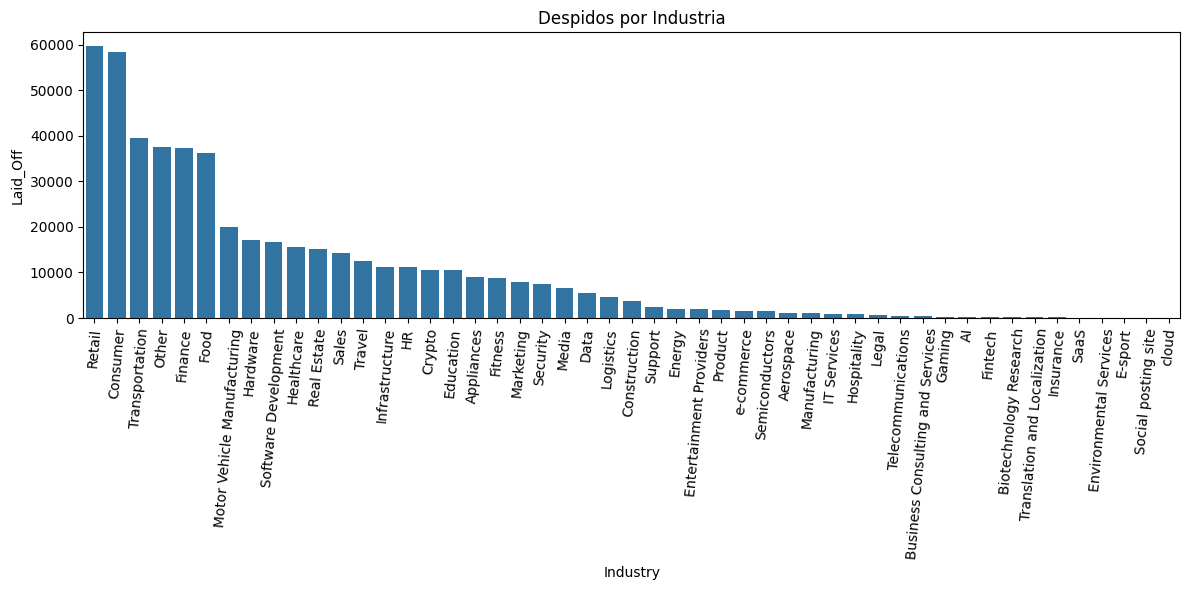

In [23]:
# Grafico de barra de despidos por industria
plt.figure(figsize=(12, 6))
sns.barplot(x=layoffs_by_industry.index, 
           y=layoffs_by_industry['Laid_Off'])
plt.title('Despidos por Industria')
plt.xticks(rotation=85)
plt.tight_layout()
plt.show()

## Análisis del gráfico de Despidos por Industria:

- El sector Retail lidera significativamente en número de despidos
- Las industrias tecnológicas y de consumo siguen de cerca
- Hay una clara diferencia entre los sectores más afectados y los menos afectados

In [24]:
# También podemos ver cuántos datos quedaron después de la limpieza
print("\nDatos no nulos después de la limpieza:")
print(df_layoffs_clean[['Laid_Off', 'Company_Size_before_Layoffs', 'Percentage']].count())


Datos no nulos después de la limpieza:
Laid_Off                       1677
Company_Size_before_Layoffs    1584
Percentage                        0
dtype: int64


## 1.4 Correlación con inversión en IA


In [25]:
# Usando df2 (corporate-investment-in-artificial-intelligence-by-type.csv)
# Acá sacamos la tendencia de los años para ver lo invertido en IA
investment_trend = dfs["df2"].groupby('Year')['Global corporate investment in AI'].mean()
print("\nTendencia de inversión en IA por año:")
print(investment_trend)


Tendencia de inversión en IA por año:
Year
2013    6.778981e+09
2014    8.717324e+09
2015    1.162914e+10
2016    1.527321e+10
2017    2.375411e+10
2018    3.436722e+10
2019    4.378210e+10
2020    8.480107e+10
2021    1.349600e+11
2022    8.701627e+10
2023    6.728766e+10
Name: Global corporate investment in AI, dtype: float64


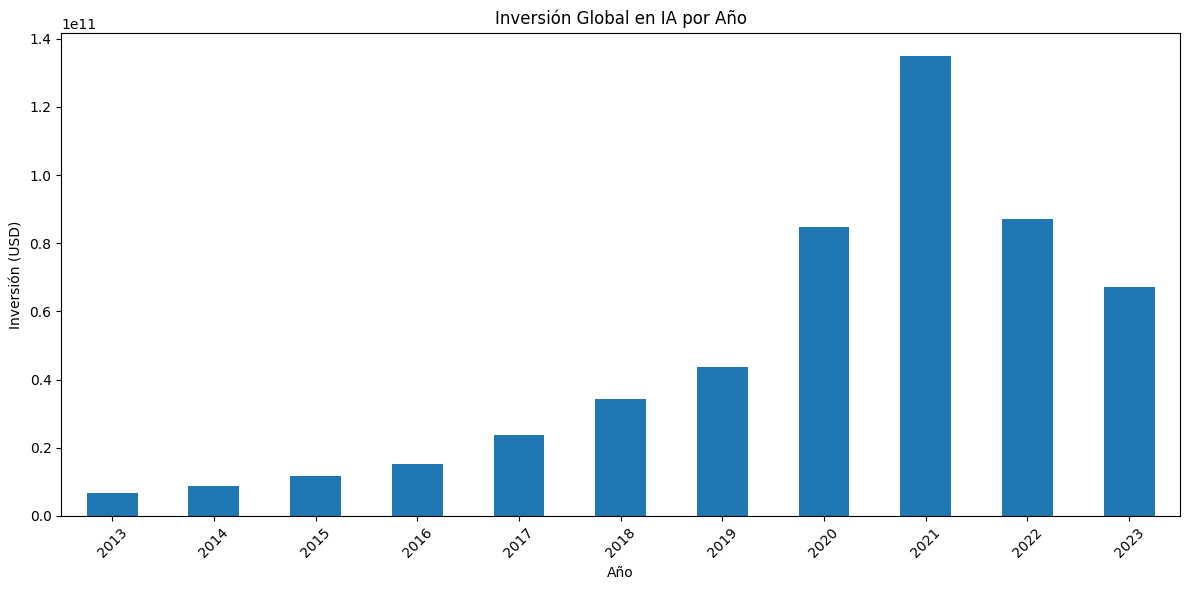

In [26]:
# Grafico de barras con inversión en IA
plt.figure(figsize=(12, 6))
investment_trend.plot(kind='bar')
plt.title('Inversión Global en IA por Año')
plt.xlabel('Año')
plt.ylabel('Inversión (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Análisis del gráfico de Inversión Global:

- Crecimiento exponencial desde 2013 hasta 2021
- Hay una suma historica en el año 2021 (cerca de 135 mil millones USD)
- Y del declive luego deñ post-2021
- La tendencia muestra tres fases: crecimiento gradual (2013-2019), luego de aceleración (2019-2021), y luego de un ajuste de descrecimiento a comparación del año 2021 (2021-2023)

## 1.5. Conclusiones


In [27]:
print( """
Ahora a base de estos Análisis anteriores podemos responder a la pregunta en base que encontramos:

Desde la participacion en los roles es sumamente suscetible por los roles con más tareas repetitivas y estandarizadas
Posiciones en  donde los sectores son administrativos y de uso más tecnologico y con
trabajos con alto volumen de procesamiento de datos.
    
Esto debido a la fuerte correlación (0.93) entre el número de tareas y la implementación de modelos de IA
Los trabajos que requieren entre 20-40% de carga de trabajo IA son los más comunes y más a
la inversión de la IA que aumentó significativamente hasta 2021, permitiendo mayor automatización.

Con sectores como Retail, Consumer, Tech en donde muestran mayor reestructuración y se logra
la creación de un balance entre trabajo humano y automatización.
Y de igual manera a las ideas de las mismas empresas con sus ajustes, gracias al impacto de la IA con sus patrones de despidos

LLegando a concluir que se está creando un nuevo modelo donde la automatización y las personas trabajan juntas, y los roles cambian según cómo se adapten a la IA.
""")


Ahora a base de estos Análisis anteriores podemos responder a la pregunta en base que encontramos:

Desde la participacion en los roles es sumamente suscetible por los roles con más tareas repetitivas y estandarizadas
Posiciones en  donde los sectores son administrativos y de uso más tecnologico y con
trabajos con alto volumen de procesamiento de datos.
    
Esto debido a la fuerte correlación (0.93) entre el número de tareas y la implementación de modelos de IA
Los trabajos que requieren entre 20-40% de carga de trabajo IA son los más comunes y más a
la inversión de la IA que aumentó significativamente hasta 2021, permitiendo mayor automatización.

Con sectores como Retail, Consumer, Tech en donde muestran mayor reestructuración y se logra
la creación de un balance entre trabajo humano y automatización.
Y de igual manera a las ideas de las mismas empresas con sus ajustes, gracias al impacto de la IA con sus patrones de despidos

LLegando a concluir que se está creando un nuevo modelo